# Estimation d'un écho

On commence par définir les conditions expérimentales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
# Atténuation
a = 0.5

# Retard (en secondes)
d = 0.3

Signal émis (bruit blanc) :

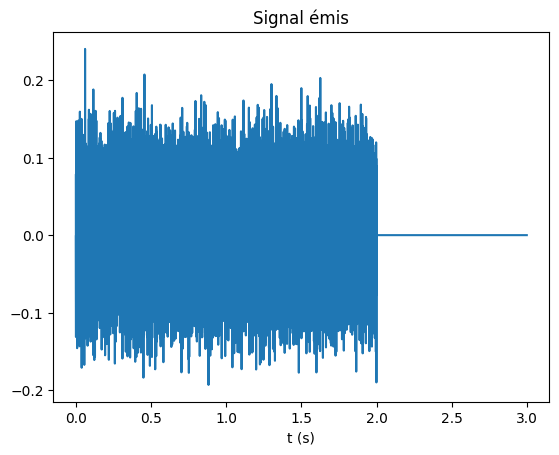

In [3]:
# Fréquence et période d'échantillonnage
fe = 22e3
Te = 1/fe

# Nombre de points
N = int(fe)

# Son (avec une seconde de silence ensuite)
s = np.random.randn(2*N) * .05
s = np.concatenate([s, np.zeros(N)])

N = len(s)
n = np.arange(N)
t = (n-1)*Te

# Affichage
plt.figure()
plt.plot(t,s)
plt.xlabel('t (s)')
plt.title('Signal émis')
plt.show()

# Ecoute
Audio(s, rate=fe)

Signal reçu

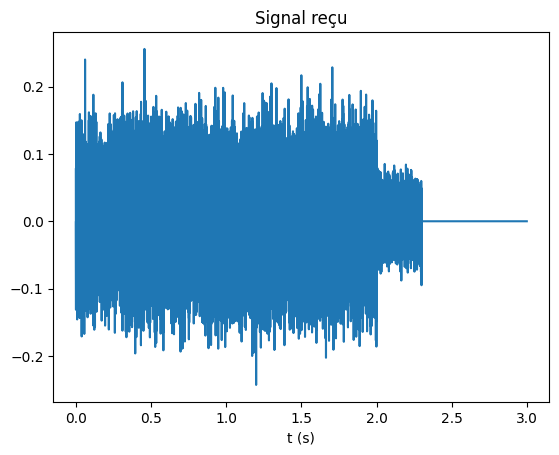

In [4]:
# Retard (en échantillons)
D = int(d/Te)

# Signal réfléchi (seul)
reflected = np.concatenate([np.zeros(D), s])
reflected = a * reflected[:N]

# Signal reçu (direct + réfléchi)
x = s + reflected

# Affichage
plt.figure()
plt.plot(t,x)
plt.xlabel('t (s)')
plt.title('Signal reçu')
plt.show()

# Ecoute
Audio(x, rate=fe)

Autocorrélation

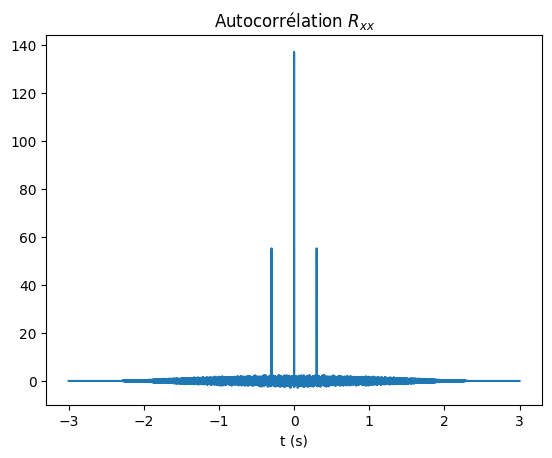

In [5]:
# Autocorrélation
c = np.correlate(x, x, mode="full")
n = np.arange(-N,N-1)

# Affichage
plt.figure()
plt.plot(n*Te,c)
plt.xlabel('t (s)')
plt.title('Autocorrélation $R_{xx}$')
plt.show()

On peut maintenant chercher les pics, et déterminer à partir ce ceux-ci les paramètres de l'écho.

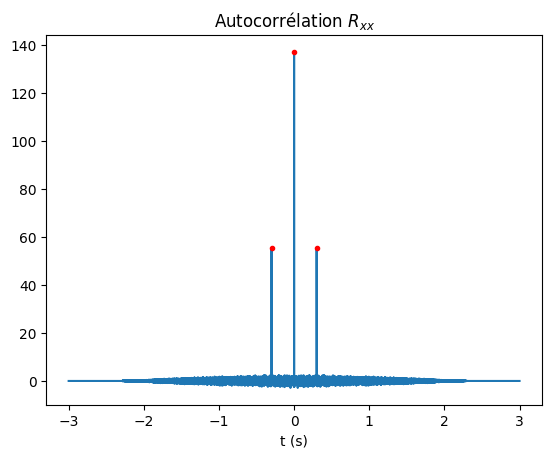

Premier maximum en -0.00 s égal à 137.21
Second maximum en  0.30 s égal à 55.30
Donc d = 0.30 s et a = 0.51


In [6]:
# Recherche des pics
from scipy.signal import find_peaks
peaks, props = find_peaks(c, distance=4000, height=10)

# Affichage des pics sur l'autocorrélation
plt.figure()
plt.plot(n*Te,c)
plt.xlabel('t (s)')
plt.title('Autocorrélation $R_{xx}$')
plt.plot(n[peaks]*Te, c[peaks], 'r.');
plt.show()

# Décalages des pics
t_direct = n[peaks[1]]*Te
t_reflected = n[peaks[2]]*Te

# Amplitude des pics
h_direct = c[peaks[1]]
h_reflected = c[peaks[2]]

# Paramètres
delta = h_direct**2 - 4*h_reflected**2
aest = (h_direct-np.sqrt(delta)) / (2*h_reflected)

# Affichage
print(f'Premier maximum en {t_direct:.2f} s égal à {h_direct:.2f}')
print(f'Second maximum en  {t_reflected:.2f} s égal à {h_reflected:.2f}')
print(f'Donc d = {t_reflected:.2f} s et a = {aest:.2f}')